In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read saved csv files
TrainVal     = pd.read_csv('00TrainVal.csv',index_col=0,parse_dates=True)

In [3]:
TrainVal

,f1,f2,f3,f4,f5,f6,f7
2019-03-01 00:00:00,104.0,98.0,132.0,125.0,128.0,38.0,45.0
2019-03-01 00:05:00,100.0,95.0,135.0,125.0,119.0,72.0,77.0
2019-03-01 00:10:00,110.0,124.0,132.0,112.0,118.0,73.0,73.0
2019-03-01 00:15:00,110.0,102.0,103.0,100.0,106.0,88.0,90.0
2019-03-01 00:20:00,101.0,98.0,117.0,114.0,109.0,66.0,62.0
...,...,...,...,...,...,...,...
2019-06-30 23:35:00,141.0,143.0,150.0,142.0,153.0,110.0,84.0
2019-06-30 23:40:00,132.0,128.0,139.0,116.0,114.0,98.0,89.0
2019-06-30 23:45:00,106.0,111.0,123.0,127.0,146.0,94.0,85.0
2019-06-30 23:50:00,137.0,140.0,141.0,103.0,124.0,109.0,95.0


# Urban Expressway

Stockton CA; Total length = ~10km

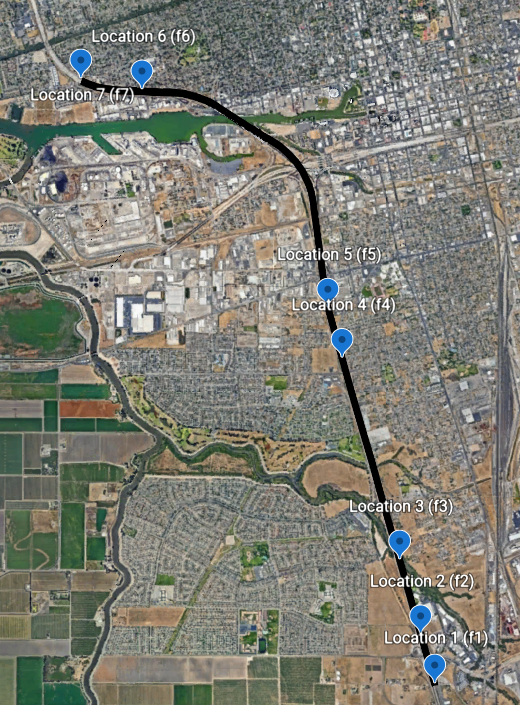

------------------------------------------

# 1) Analysis of dataset

--------------------------------------------

## (i) Spatial Analysis

In [4]:
f1  = TrainVal['f1'][(TrainVal.index.month == 4) & (TrainVal.index.day == 15)]
f2  = TrainVal['f2'][(TrainVal.index.month == 4) & (TrainVal.index.day == 15)]
f3  = TrainVal['f3'][(TrainVal.index.month == 4) & (TrainVal.index.day == 15)]
f4  = TrainVal['f4'][(TrainVal.index.month == 4) & (TrainVal.index.day == 15)]
f5  = TrainVal['f5'][(TrainVal.index.month == 4) & (TrainVal.index.day == 15)]
f6  = TrainVal['f6'][(TrainVal.index.month == 4) & (TrainVal.index.day == 15)]
f7  = TrainVal['f7'][(TrainVal.index.month == 4) & (TrainVal.index.day == 15)]

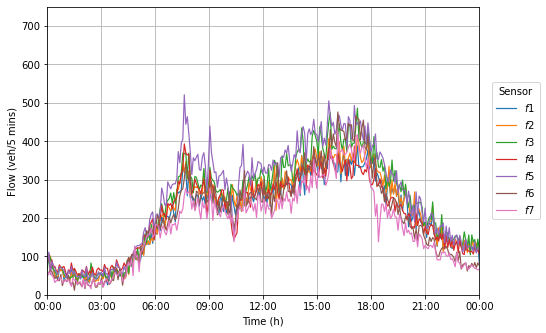

In [5]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# map timestamp to a variable x
x = np.linspace(0,288,288)

# Plot on that set of axes
axes.plot(x, f1, lw=1.2, label=r'$f1$')
axes.plot(x, f2, lw=1.2, label=r'$f2$')
axes.plot(x, f3, lw=1.2, label=r'$f3$')
axes.plot(x, f4, lw=1.2, label=r'$f4$')
axes.plot(x, f5, lw=1.2, label=r'$f5$')
axes.plot(x, f6, lw=1.2, label=r'$f6$')
axes.plot(x, f7, lw=1.2, label=r'$f7$')

axes.set_xlim(0,24)
axes.set_ylim(0,750)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(
    loc='center left',
    bbox_to_anchor=(1.03, 0.5),
    borderaxespad=0,
    title="Sensor"
           )
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

In [6]:
# Pearson correlation coefficient
TrainVal.corr()

,f1,f2,f3,f4,f5,f6,f7
f1,1.000000,0.983467,0.982369,0.954534,0.966205,0.935276,0.930421
f2,0.983467,1.000000,0.979566,0.951448,0.963028,0.937773,0.929167
f3,0.982369,0.979566,1.000000,0.962353,0.975538,0.951391,0.944408
f4,0.954534,0.951448,0.962353,1.000000,0.990600,0.944275,0.936791
f5,0.966205,0.963028,0.975538,0.990600,1.000000,0.958223,0.950161
f6,0.935276,0.937773,0.951391,0.944275,0.958223,1.000000,0.984888
f7,0.930421,0.929167,0.944408,0.936791,0.950161,0.984888,1.000000


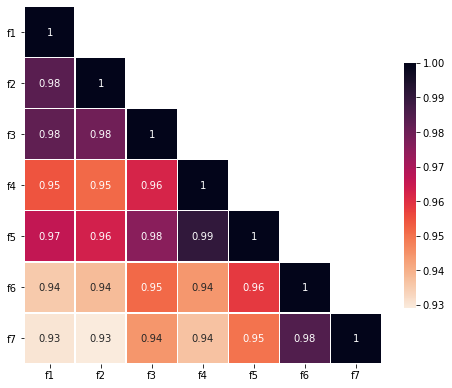

In [7]:
# The above as a plot

corr = TrainVal.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

crr.set_yticklabels(crr.get_yticklabels(), rotation=0);

-------------------

-------------------

## (ii) Temporal Analysis

### (a) Week pattern (mon - mon)

In [8]:
# Typical week flow data for visualization
Week1 = TrainVal[(TrainVal.index.month == 4) & (TrainVal.index.day == 22)]     # Mon 22-04-2019
Week2 = TrainVal[(TrainVal.index.month == 4) & (TrainVal.index.day == 29)]     # Mon 29-04-2019
Week3 = TrainVal[(TrainVal.index.month == 5) & (TrainVal.index.day == 6)]      # Mon 06-05-2019
Week4 = TrainVal[(TrainVal.index.month == 5) & (TrainVal.index.day == 13)]     # Mon 13-05-2019
Week5 = TrainVal[(TrainVal.index.month == 5) & (TrainVal.index.day == 20)]     # Mon 20-05-2019

In [9]:
Week1.index = range(len(Week1))
Week2.index = range(len(Week2))
Week3.index = range(len(Week3))
Week4.index = range(len(Week4))
Week5.index = range(len(Week5))

In [10]:
Week1 # Typical week flow data

,f1,f2,f3,f4,f5,f6,f7
0,74.0,75.0,79.0,101.0,93.0,63.0,61.0
1,117.0,109.0,99.0,96.0,94.0,66.0,64.0
2,92.0,98.0,115.0,85.0,95.0,61.0,68.0
3,87.0,86.0,93.0,94.0,96.0,69.0,60.0
4,70.0,68.0,96.0,87.0,85.0,54.0,62.0
...,...,...,...,...,...,...,...
283,152.0,156.0,167.0,118.0,140.0,81.0,79.0
284,97.0,104.0,112.0,122.0,144.0,101.0,81.0
285,123.0,124.0,137.0,117.0,125.0,76.0,77.0
286,119.0,127.0,157.0,120.0,129.0,86.0,84.0


In [11]:
data = {
        "Mon 22-04": Week1['f5'],
        "Mon 29-04": Week2['f5'],
        "Mon 06-05": Week3['f5'],
        "Mon 13-05": Week4['f5'],
        "Mon 20-05": Week5['f5'],
        }
day_pattern = pd.concat(data,axis = 1)

In [12]:
day_pattern

,Mon 22-04,Mon 29-04,Mon 06-05,Mon 13-05,Mon 20-05
0,93.0,91.0,94.0,80.0,93.0
1,94.0,104.0,84.0,87.0,89.0
2,95.0,94.0,72.0,85.0,90.0
3,96.0,90.0,86.0,82.0,88.0
4,85.0,83.0,70.0,71.0,76.0
...,...,...,...,...,...
283,140.0,130.0,120.0,136.0,116.0
284,144.0,129.0,122.0,121.0,112.0
285,125.0,119.0,119.0,103.0,87.0
286,129.0,118.0,107.0,150.0,110.0


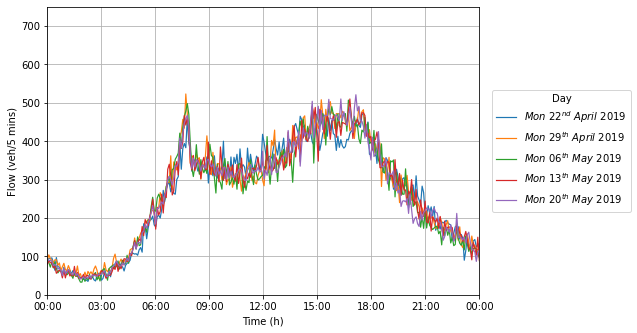

In [13]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# map timestamp to a variable x
x = np.linspace(0,288,288)

# Plot on that set of axes
axes.plot(x, day_pattern["Mon 22-04"], lw=1.2, label=r'$Mon\ 22^{nd}\ April\ 2019$')
axes.plot(x, day_pattern["Mon 29-04"], lw=1.2, label=r'$Mon\ 29^{th}\ April\ 2019$')
axes.plot(x, day_pattern["Mon 06-05"], lw=1.2, label=r'$Mon\ 06^{th}\ May\ 2019$')
axes.plot(x, day_pattern["Mon 13-05"], lw=1.2, label=r'$Mon\ 13^{th}\ May\ 2019$')
axes.plot(x, day_pattern["Mon 20-05"], lw=1.2, label=r'$Mon\ 20^{th}\ May\ 2019$')


axes.set_xlim(0,24)
axes.set_ylim(0,750)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(
    loc='center left',
    bbox_to_anchor=(1.03, 0.5),
    borderaxespad=0,
    title="Day"
           )
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

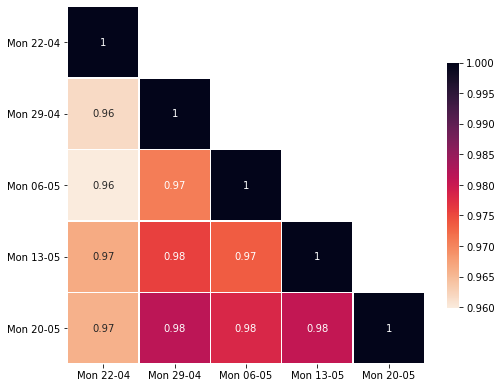

In [14]:
# The above as a plot

corr = day_pattern.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r", fmt='.2g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

crr.set_yticklabels(crr.get_yticklabels(), rotation=0);

## 05/27/2019	Memorial Day	Monday

<AxesSubplot:>

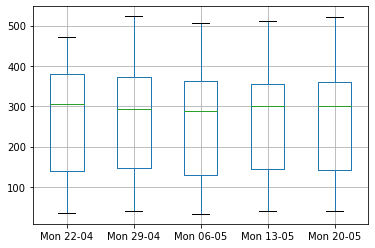

In [15]:
day_pattern.boxplot()

### (b) Day pattern (mon - fri)

In [16]:
day1 = TrainVal[(TrainVal.index.month == 5) & (TrainVal.index.day == 20)]     # Monday
day2 = TrainVal[(TrainVal.index.month == 5) & (TrainVal.index.day == 21)]     # Tuesday
day3 = TrainVal[(TrainVal.index.month == 5) & (TrainVal.index.day == 22)]     # Wednesday
day4 = TrainVal[(TrainVal.index.month == 5) & (TrainVal.index.day == 23)]     # Thursday
day5 = TrainVal[(TrainVal.index.month == 5) & (TrainVal.index.day == 24)]     # Friday

In [17]:
day6 = TrainVal[(TrainVal.index.month == 5) & (TrainVal.index.day == 25)]     # Saturday
day7 = TrainVal[(TrainVal.index.month == 5) & (TrainVal.index.day == 26)]     # Sunday

In [18]:
day1.index = range(len(day1))
day2.index = range(len(day2))
day3.index = range(len(day3))
day4.index = range(len(day4))
day5.index = range(len(day5))
day6.index = range(len(day6))
day7.index = range(len(day7))

In [19]:
day1

,f1,f2,f3,f4,f5,f6,f7
0,90.0,88.0,88.0,3.0,93.0,63.0,55.0
1,87.0,90.0,100.0,3.0,89.0,66.0,58.0
2,84.0,84.0,98.0,3.0,90.0,63.0,62.0
3,70.0,79.0,86.0,0.0,88.0,61.0,51.0
4,74.0,73.0,82.0,3.0,76.0,54.0,57.0
...,...,...,...,...,...,...,...
283,124.0,137.0,153.0,107.0,116.0,85.0,75.0
284,91.0,99.0,107.0,106.0,112.0,70.0,68.0
285,109.0,110.0,101.0,90.0,87.0,62.0,66.0
286,108.0,120.0,123.0,105.0,110.0,68.0,64.0


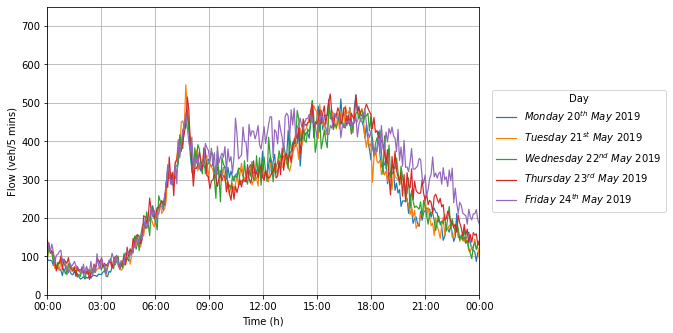

In [20]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# map timestamp to a variable x
x = np.linspace(0,288,288)

# Plot on that set of axes
axes.plot(x,day1['f5'], lw=1.2, label=r'$Monday\ 20^{th}\ May\ 2019$')
axes.plot(x,day2['f5'], lw=1.2, label=r'$Tuesday\ 21^{st}\ May\ 2019$')
axes.plot(x,day3['f5'], lw=1.2, label=r'$Wednesday\ 22^{nd}\ May\ 2019$')
axes.plot(x,day4['f5'], lw=1.2, label=r'$Thursday\ 23^{rd}\ May\ 2019$')
axes.plot(x,day5['f5'], lw=1.2, label=r'$Friday\ 24^{th}\ May\ 2019$')

axes.set_xlim(0,24)
axes.set_ylim(0,750)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(
    loc='center left',
    bbox_to_anchor=(1.03, 0.5),
    borderaxespad=0,
    title="Day"
           )
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

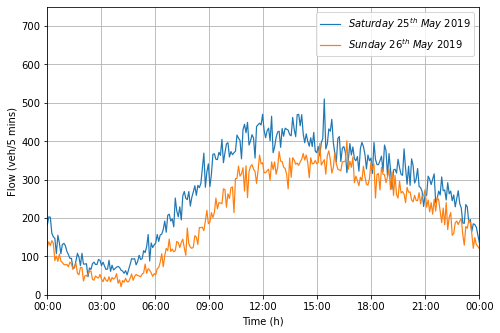

In [21]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# map timestamp to a variable x
x = np.linspace(0,288,288)

# Plot on that set of axes
axes.plot(x,day6['f5'], lw=1.2, label=r'$Saturday\ 25^{th}\ May\ 2019$')
axes.plot(x,day7['f5'], lw=1.2, label=r'$Sunday\ 26^{th}\ May\ 2019$')

axes.set_xlim(0,24)
axes.set_ylim(0,750)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

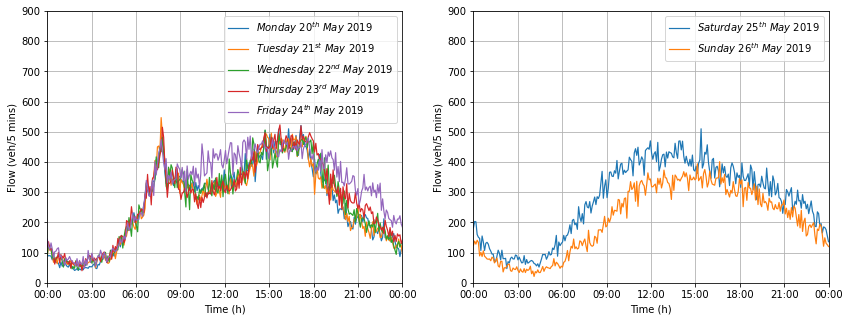

In [22]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(14,5))

axes[0].plot(x,day1['f5'], lw=1.2, label=r'$Monday\ 20^{th}\ May\ 2019$')
axes[0].plot(x,day2['f5'], lw=1.2, label=r'$Tuesday\ 21^{st}\ May\ 2019$')
axes[0].plot(x,day3['f5'], lw=1.2, label=r'$Wednesday\ 22^{nd}\ May\ 2019$')
axes[0].plot(x,day4['f5'], lw=1.2, label=r'$Thursday\ 23^{rd}\ May\ 2019$')
axes[0].plot(x,day5['f5'], lw=1.2, label=r'$Friday\ 24^{th}\ May\ 2019$')

axes[1].plot(x,day6['f5'], lw=1.2, label=r'$Saturday\ 25^{th}\ May\ 2019$')
axes[1].plot(x,day7['f5'], lw=1.2, label=r'$Sunday\ 26^{th}\ May\ 2019$')

for i in range(0,2):
    axes[i].set_xlim(0,24)
    axes[i].set_ylim(0,900)
    axes[i].set_xlabel('Time (h)')
    axes[i].set_ylabel('Flow (veh/5-Min)')

    axes[i].legend(loc=1)
    axes[i].grid()

    axes[i].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
    axes[i].set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])
    
plt.show()

In [23]:
data = {
        "Mon": day1['f5'],
        "Tue": day2['f5'],
        "Wed": day3['f5'],
        "Thu": day4['f5'],
        "Fri": day5['f5'],
        "Sat": day6['f5'],
        "Sun": day7['f5'],
        }
week_pattern = pd.concat(data,axis = 1)

In [24]:
week_pattern 

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,93.0,91.0,93.0,120.0,145.0,182.0,124.0
1,89.0,125.0,128.0,136.0,120.0,203.0,138.0
2,90.0,116.0,111.0,108.0,111.0,202.0,128.0
3,88.0,107.0,115.0,114.0,132.0,160.0,141.0
4,76.0,93.0,81.0,107.0,111.0,151.0,134.0
...,...,...,...,...,...,...,...
283,116.0,121.0,127.0,162.0,211.0,185.0,121.0
284,112.0,145.0,137.0,155.0,211.0,183.0,149.0
285,87.0,121.0,118.0,159.0,222.0,176.0,131.0
286,110.0,124.0,131.0,130.0,195.0,156.0,126.0


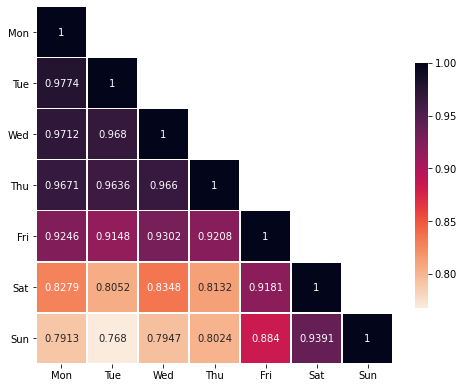

In [25]:
# The above as a plot

corr = week_pattern.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r", fmt='.4g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

crr.set_yticklabels(crr.get_yticklabels(), rotation=0);

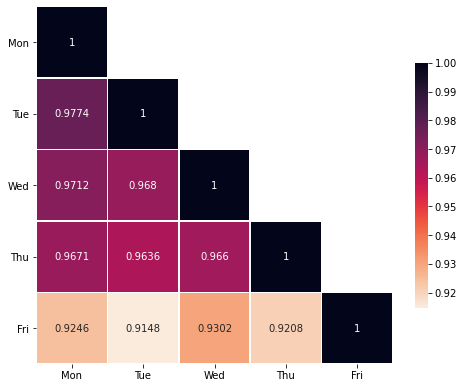

In [26]:
# The above as a plot (just Monday to Friday)

corr = week_pattern.drop(columns=["Sat","Sun"]).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r", fmt='.4g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

crr.set_yticklabels(crr.get_yticklabels(), rotation=0);

<AxesSubplot:>

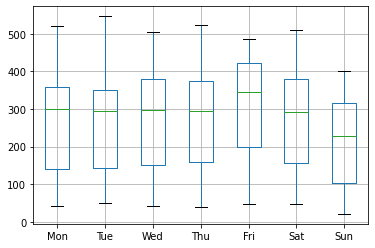

In [27]:
week_pattern.boxplot()